In [2]:
import networkx as nx
from diffusion_models import Weighted_Cascade, Trivalency_Model, Independent_Cascade, Decreasing_Cascade, linear_threshold, general_threshold
from influence_max_algorithms import MIA
import matplotlib.pyplot as plt
import numpy as np
import tqdm as tqdm
import time as time
import pandas as pd

from nbc import non_backtracking_centrality

import pickle


In [3]:
pb2020 = nx.read_gml('/Users/davidguzman/Documents/GitHub/Network-Science-final-Maximization-/Proud_Boys_Datsets/PB2020.gml')

In [4]:
#invert edge direction for PB2020
pb2020 = pb2020.reverse()

In [6]:
#print number of nodes and edges
print('Number of nodes: ', pb2020.number_of_nodes())
print('Number of edges: ', pb2020.number_of_edges())

Number of nodes:  13217
Number of edges:  14477


In [5]:
seed_size = 30

In [5]:
ICM_model_2020 = Independent_Cascade()
ICM_model_2020.fit(pb2020)
decreasing_cascade_model_2020 = Decreasing_Cascade()
decreasing_cascade_model_2020.fit(pb2020)
weighted_cascade_model_2020 = Weighted_Cascade()
weighted_cascade_model_2020.fit(pb2020)
trivalency_model_2020 = Trivalency_Model()
trivalency_model_2020.fit(pb2020)
linear_threshold_model_2020 = linear_threshold()
linear_threshold_model_2020.fit(pb2020)
general_threshold_model_2020 = general_threshold()
general_threshold_model_2020.fit(pb2020)

In [8]:
def assing_model_probs_to_weights(model):
    pb2020_model = pb2020.copy()
    for edge in pb2020_model.edges():
        prob = model.probability[model.label2id[edge[0]], model.label2id[edge[1]]]

        if pb2020_model.in_degree(edge[0]) == 0: # to avoid division by 0

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
        else:

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))
    return pb2020_model

In [9]:
def assing_model_probs_to_weights_threshold(model):
    pb2020_model = pb2020.copy()
    for edge in pb2020_model.edges():
        prob = model.influence[model.label2id[edge[0]], model.label2id[edge[1]]]

        if pb2020_model.in_degree(edge[0]) == 0: # to avoid division by 0

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob + 0.00000001)) # to avoid diverging to - infinity
        else:

            pb2020_model[edge[0]][edge[1]]['weight'] = prob
            pb2020_model[edge[0]][edge[1]]['weight_negative_log'] = np.abs(np.log(prob))
    return pb2020_model

# Diffusion models + MIA

In [10]:
pb2020_independent_cascade = assing_model_probs_to_weights(ICM_model_2020)
pb2020_weighted_cascade = assing_model_probs_to_weights(weighted_cascade_model_2020)
pb2020_decreasing_cascade = assing_model_probs_to_weights(decreasing_cascade_model_2020)
pb2020_trivalency = assing_model_probs_to_weights(trivalency_model_2020)

In [11]:
pb2020_linear_threshold = assing_model_probs_to_weights_threshold(linear_threshold_model_2020)
pb2020_general_threshold = assing_model_probs_to_weights_threshold(general_threshold_model_2020)

In [11]:
mia = MIA(pb2020_weighted_cascade)
mia_icm = MIA(pb2020_independent_cascade)
mia_decreasing = MIA(pb2020_decreasing_cascade)
mia_trivalency = MIA(pb2020_trivalency)
mia_linear_threshold = MIA(pb2020_linear_threshold)
mia_general_threshold = MIA(pb2020_general_threshold)

### calcualtion of MIA

In [12]:
start = time.time()

end = time.time()

print(end - start)

1.3113021850585938e-05


In [13]:
seed_wcm, timings_wcm = mia.MIA_fast_timed(pb2020_weighted_cascade, 20, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:42<00:00, 309.16it/s]


Initialization Completed


100%|██████████| 20/20 [04:14<00:00, 12.72s/it]


In [12]:
seed_icm, timings_icm = mia_icm.MIA_fast(pb2020_independent_cascade, 100, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:46<00:00, 282.38it/s]


Initialization Completed


100%|██████████| 100/100 [20:41<00:00, 12.41s/it]


In [13]:
seed_dc, timings_dc = mia_decreasing.MIA_fast(pb2020_decreasing_cascade, 100, 0.5)


Starting MIA intialization


100%|██████████| 13217/13217 [00:45<00:00, 292.91it/s]


Initialization Completed


100%|██████████| 100/100 [19:18<00:00, 11.58s/it]


In [14]:
seed_trivalency, timings_tr = mia_trivalency.MIA_fast(pb2020_trivalency, 100, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:44<00:00, 295.98it/s]


Initialization Completed


100%|██████████| 100/100 [18:20<00:00, 11.00s/it]


In [15]:
seed_lt, timings_lt = mia_linear_threshold.MIA_fast(pb2020_linear_threshold, 100, 0.5)


Starting MIA intialization


100%|██████████| 13217/13217 [00:42<00:00, 312.00it/s]


Initialization Completed


100%|██████████| 100/100 [18:21<00:00, 11.02s/it]


In [16]:
seed_gt, timings_gt = mia_general_threshold.MIA_fast(pb2020_general_threshold, 100, 0.5)

Starting MIA intialization


100%|██████████| 13217/13217 [00:44<00:00, 294.25it/s]


Initialization Completed


100%|██████████| 100/100 [19:11<00:00, 11.51s/it]


In [6]:
# open pickle 
with open('mia_timings_wcm.pickle', 'rb') as handle:
    timings_wcm = pickle.load(handle)

with open('mia_timings_icm.pickle', 'rb') as handle:
    timings_icm = pickle.load(handle)

with open('mia_timings_dc.pickle', 'rb') as handle:
    timings_dc = pickle.load(handle)

with open('mia_timings_tr.pickle', 'rb') as handle:
    timings_tr = pickle.load(handle)

with open('mia_timings_lt.pickle', 'rb') as handle:
    timings_lt = pickle.load(handle)

with open('mia_timings_gt.pickle', 'rb') as handle:
    timings_gt = pickle.load(handle)

In [7]:
# naive times
times_IC = [10.741265773773193, 236.766015291214, 627.04882645607, 1146.5669751167297, 1785.7016961574554, 2523.2258718013763, 3351.641788005829, 4245.376266717911, 5212.538978815079, 6237.875088214874, 7317.844819784164, 8447.575536966324, 9625.548919200897, 10851.33715724945, 12123.000044822693, 13442.503648996353, 14809.777120113373, 16218.910614013672, 17672.560995817184, 19170.619923830032]
times_DC = [14.71357774734497, 341.92752385139465, 883.5976860523224, 1604.629472732544, 2461.862696647644, 3426.686062335968, 4488.1514637470245, 5628.830832004547, 6839.51228928566, 8111.640333890915, 9430.324719429016, 10844.845517396927, 12300.381844520569, 13789.093884468079, 15337.097647666931, 16933.31753540039, 18599.448838949203, 20311.356774568558, 22050.487572193146, 23826.209863185883]
times_WC = [10.501221656799316, 235.98831987380981, 625.4327020645142, 1132.241504907608, 1809.7334263324738, 2598.581643819809, 3467.8672041893005, 4406.797207117081, 5355.24767780304, 6342.11412024498, 7458.015537261963, 8603.017973661423, 9797.863656759262, 11074.132063627243, 12310.55555319786, 13591.142619132996, 14951.905377626419, 16330.707174301147, 17719.568944215775, 19143.71673488617]
times_TR = [18.019221544265747, 156.49585819244385, 395.5374298095703, 723.4392213821411, 1133.3423926830292, 1609.7385127544403, 2154.3022668361664, 2741.3912711143494, 3391.6078243255615, 4085.584150791168, 4820.813318014145, 5598.237213373184, 6419.274331569672, 7276.819481611252, 8177.669565916061, 9132.094334602356, 10119.729833602905, 11174.835460424423, 12276.010423660278, 13419.909896850586]
times_LT = [23.280896425247192, 4712.373671770096, 12369.735314130783, 22337.77462410927]
times_GT = [18.407705545425415, 4388.646020650864, 11171.983466386795, 19730.343330144882]


In [14]:
celf_IC_time = [515.0244359970093, 517.8426225185394, 641.6042211055756, 1220.2066597938538, 5177.020837068558, 5177.973946094513, 5243.100147247314, 6642.570923089981, 6687.883443117142, 6743.658916950226, 7469.340130329132, 7481.095819950104, 8481.791491031647, 8789.102011919022, 8790.184591531754, 9761.755005836487, 15178.846940040588, 15383.035708904266, 15384.08792090416, 15397.21490597725]
celf_DC_time = [135.77107667922974, 136.08820033073425, 136.4457938671112, 136.86086130142212, 138.65555477142334, 140.15923881530762, 439.13199639320374, 2910.704601049423, 2911.3186736106873, 3706.2139954566956, 3730.6344969272614, 3884.7681634426117, 4180.40248799324, 4725.48167181015, 5404.599050760269, 5405.187263727188, 5415.777118444443, 7823.486579656601, 7935.886960029602, 7937.07158613205]
celf_WC_time = [488.53955936431885, 491.23416900634766, 609.2619292736053, 1162.6682426929474, 4956.835084199905, 4957.8154447078705, 5020.557333946228, 6364.423198699951, 6408.430356264114, 6461.267124176025, 7165.188543796539, 7176.490019798279, 8134.291678190231, 8429.781694889069, 8430.787642717361, 9370.909623861313, 14588.706550598145, 14782.16878247261, 14783.272115468979, 14795.677181482315]
celf_TR_time = [73.4015576839447, 73.5800564289093, 73.81907296180725, 74.08768010139465, 75.28535914421082, 76.17710900306702, 243.90924191474915, 1782.837567806244, 1783.1775259971619, 2231.054145336151, 2249.0770626068115, 2338.9165830612183, 2499.2617180347443, 2794.873381137848, 3162.9981949329376, 3163.3145003318787, 3169.1303074359894, 4564.828184843063, 4627.633970499039, 4628.259597063065]
celf_GT_time = [43.76752471923828, 43.860724449157715, 43.982332706451416, 44.1362943649292, 44.34457015991211, 44.52149820327759, 44.71859574317932, 45.56133222579956, 45.75854134559631, 173.0706536769867, 173.26326894760132, 1174.8642740249634, 1219.387167930603, 1539.414338350296, 1597.4237504005432, 1911.2873072624207, 1912.0071074962616, 1912.6998236179352, 1976.888543844223, 1979.6347115039825]
celf_LT_time = [137.845641374588, 138.12411904335022, 138.57750606536865, 138.99254822731018, 140.8390073776245, 142.25314831733704, 435.99164056777954, 2856.5507814884186, 2857.0437366962433, 3642.373048067093, 3665.8117480278015, 3809.8945486545563, 4080.883213043213, 4593.030191421509, 5254.656946659088, 5255.214297771454, 5265.233835697174, 7650.675204515457, 7757.616986274719, 7758.859664440155]

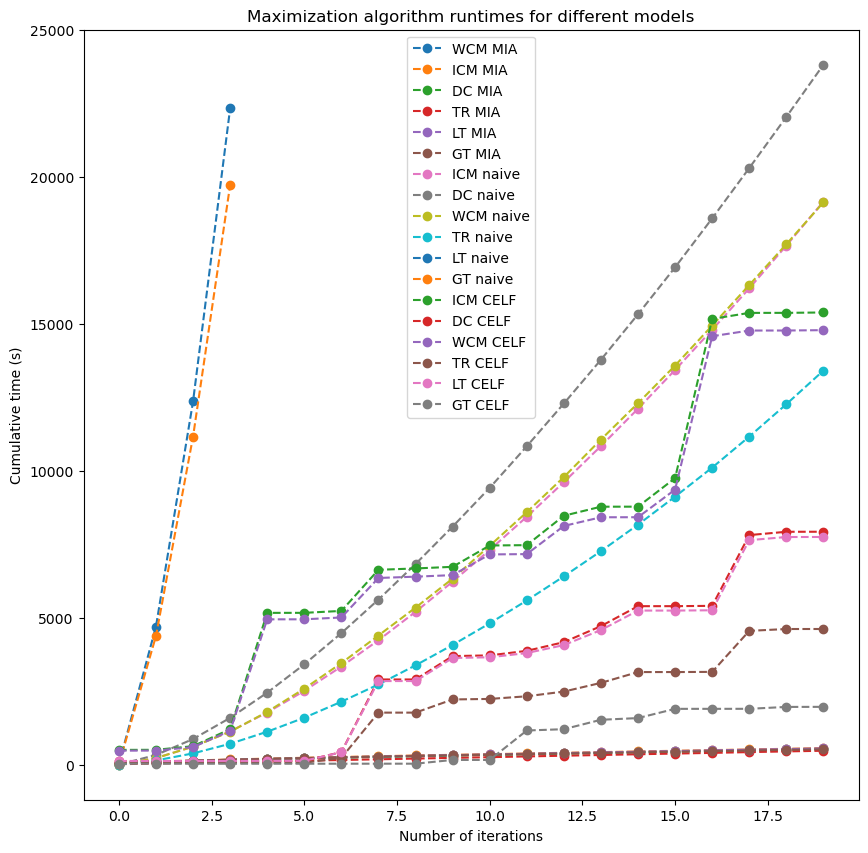

In [15]:
# plot the cumulative timings for the MIA algorithm as a function of the number of iterations
#calculate the cumulative sum of the timings

# make bigger 
plt.rcParams['figure.figsize'] = [6, 6]

cumulative_timings_wcm = np.cumsum(timings_wcm)
cumulative_timings_icm = np.cumsum(timings_icm)
cumulative_timings_dc = np.cumsum(timings_dc)
cumulative_timings_tr = np.cumsum(timings_tr)
cumulative_timings_lt = np.cumsum(timings_lt)
cumulative_timings_gt = np.cumsum(timings_gt)
#plot the cumulative timings
plt.plot(cumulative_timings_wcm,'o--', label='WCM MIA')
plt.plot(cumulative_timings_icm,'o--', label='ICM MIA')
plt.plot(cumulative_timings_dc,'o--', label='DC MIA')
plt.plot(cumulative_timings_tr,'o--', label='TR MIA')
plt.plot(cumulative_timings_lt,'o--', label='LT MIA')
plt.plot(cumulative_timings_gt,'o--', label='GT MIA')

# plot the naive timings

plt.plot(times_IC,'o--', label='ICM naive')
plt.plot(times_DC,'o--', label='DC naive')
plt.plot(times_WC,'o--', label='WCM naive')
plt.plot(times_TR,'o--', label='TR naive')
plt.plot(times_LT,'o--', label='LT naive')
plt.plot(times_GT,'o--', label='GT naive')

# plot the celf timings

plt.plot(celf_IC_time,'o--', label='ICM CELF')
plt.plot(celf_DC_time,'o--', label='DC CELF')
plt.plot(celf_WC_time,'o--', label='WCM CELF')
plt.plot(celf_TR_time,'o--', label='TR CELF')
plt.plot(celf_LT_time,'o--', label='LT CELF')
plt.plot(celf_GT_time,'o--', label='GT CELF')


plt.xlabel('Number of iterations')
plt.ylabel('Cumulative time (s)')
plt.title('Maximization algorithm runtimes for different models')
#log scale for the y axis
#plt.yscale('log')
plt.legend()
plt.show()

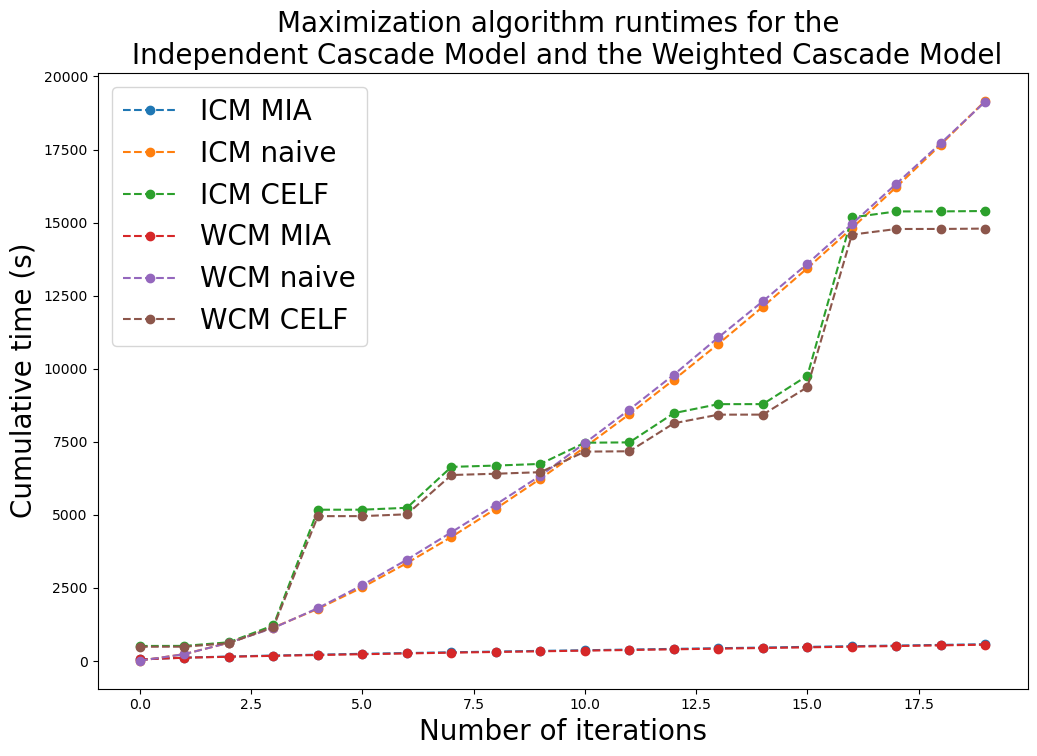

In [59]:
# plot the cumulative timings for the MIA algorithm as a function of the number of iterations
#calculate the cumulative sum of the timings

# make bigger 
plt.rcParams['figure.figsize'] = [12, 8]

cumulative_timings_icm = np.cumsum(timings_icm)

#plot the cumulative timings

plt.plot(cumulative_timings_icm,'o--', label='ICM MIA')

# plot the naive timings

plt.plot(times_IC,'o--', label='ICM naive')

# plot the celf timings

plt.plot(celf_IC_time,'o--', label='ICM CELF')

#plot the cumulative timings
plt.plot(cumulative_timings_wcm,'o--', label='WCM MIA')


# plot the naive timings

plt.plot(times_WC,'o--', label='WCM naive')

# plot the celf timings


plt.plot(celf_WC_time,'o--', label='WCM CELF')




plt.xlabel('Number of iterations', fontsize=20)
plt.ylabel('Cumulative time (s)', fontsize=20)
plt.title('Maximization algorithm runtimes for the \n Independent Cascade Model and the Weighted Cascade Model', fontsize=20)
# use two lines for the title

plt.legend(fontsize=20)
plt.show()


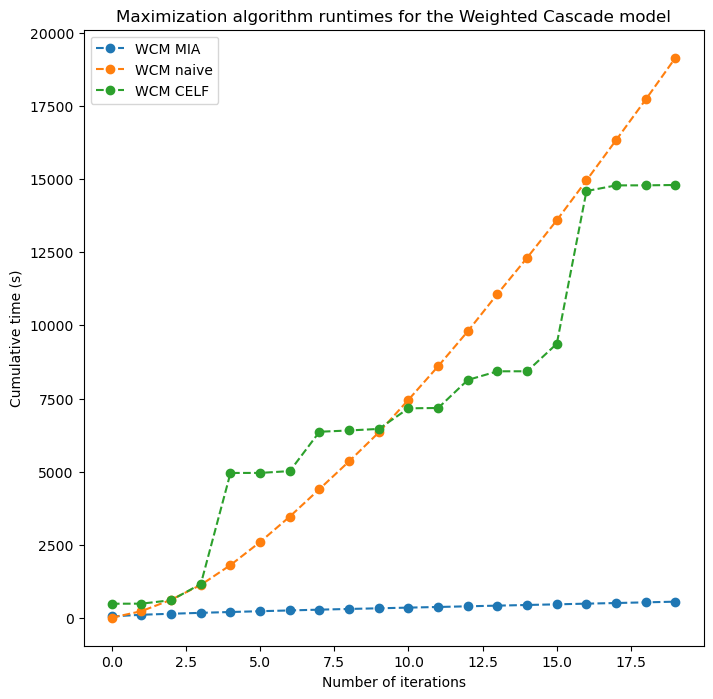

In [47]:
# plot the cumulative timings for the MIA algorithm as a function of the number of iterations
#calculate the cumulative sum of the timings

# make bigger 
plt.rcParams['figure.figsize'] = [12, 8]

cumulative_timings_wcm = np.cumsum(timings_wcm)

#plot the cumulative timings
plt.plot(cumulative_timings_wcm,'o--', label='WCM MIA')


# plot the naive timings

plt.plot(times_WC,'o--', label='WCM naive')

# plot the celf timings


plt.plot(celf_WC_time,'o--', label='WCM CELF')



plt.xlabel('Number of iterations')
plt.ylabel('Cumulative time (s)')
plt.title('Maximization algorithm runtimes for the Weighted Cascade model')

plt.legend()
plt.show()

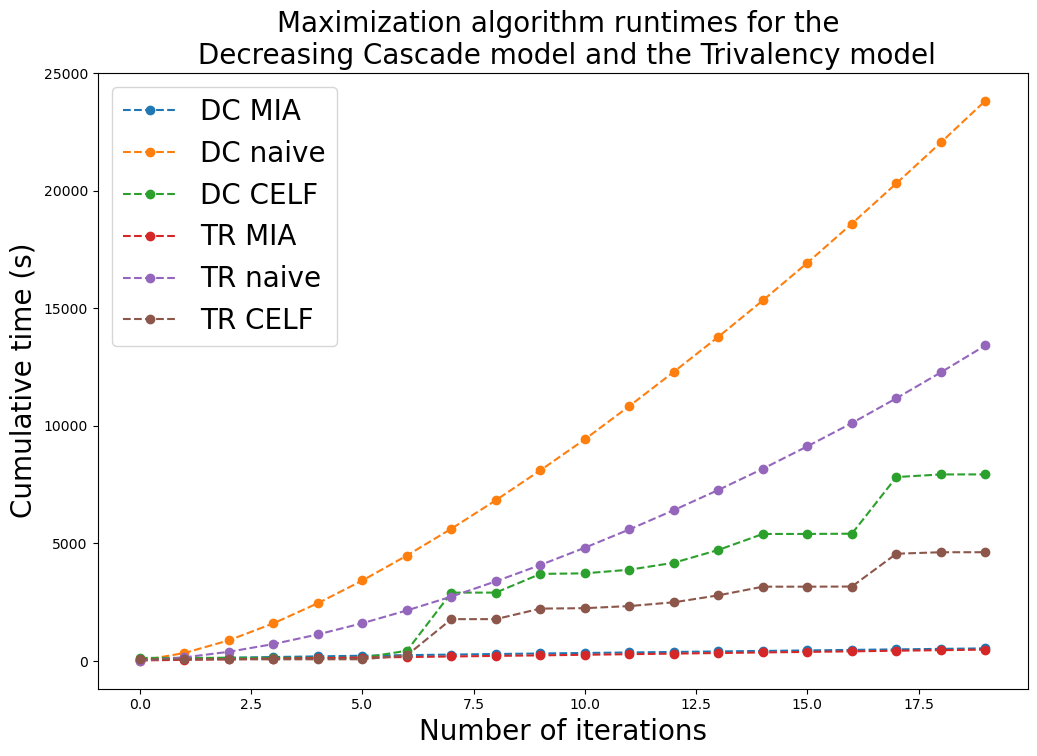

In [61]:
# plot the cumulative timings for the MIA algorithm as a function of the number of iterations
#calculate the cumulative sum of the timings

# make bigger 
plt.rcParams['figure.figsize'] = [12, 8]

cumulative_timings_dc = np.cumsum(timings_dc)

#plot the cumulative timings

plt.plot(cumulative_timings_dc,'o--', label='DC MIA')

# plot the naive timings

plt.plot(times_DC,'o--', label='DC naive')

# plot the celf timings


plt.plot(celf_DC_time,'o--', label='DC CELF')

#plot the cumulative timings

plt.plot(cumulative_timings_tr,'o--', label='TR MIA')


# plot the naive timings

plt.plot(times_TR,'o--', label='TR naive')

# plot the celf timings

plt.plot(celf_TR_time,'o--', label='TR CELF')

plt.xlabel('Number of iterations', fontsize=20)
plt.ylabel('Cumulative time (s)', fontsize=20)
plt.title('Maximization algorithm runtimes for the \n Decreasing Cascade model and the Trivalency model', fontsize=20)

plt.legend(fontsize=20)
plt.show()

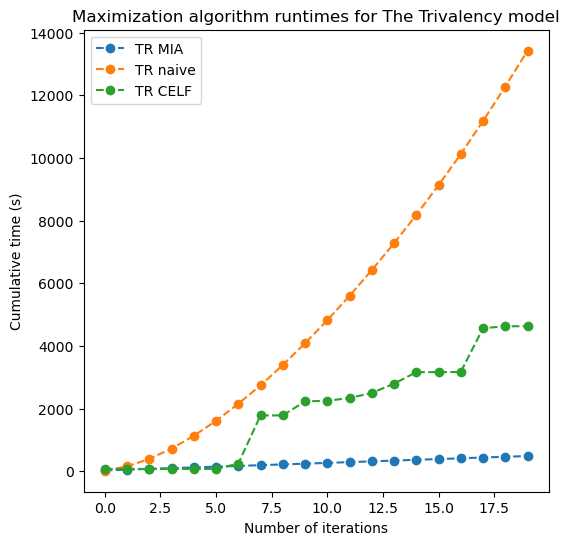

In [38]:
# plot the cumulative timings for the MIA algorithm as a function of the number of iterations
#calculate the cumulative sum of the timings

# make bigger 
plt.rcParams['figure.figsize'] = [6, 6]

cumulative_timings_tr = np.cumsum(timings_tr)

#plot the cumulative timings

plt.plot(cumulative_timings_tr,'o--', label='TR MIA')


# plot the naive timings

plt.plot(times_TR,'o--', label='TR naive')

# plot the celf timings

plt.plot(celf_TR_time,'o--', label='TR CELF')


plt.xlabel('Number of iterations')
plt.ylabel('Cumulative time (s)')
plt.title('Maximization algorithm runtimes for The Trivalency model')

plt.legend()
plt.show()

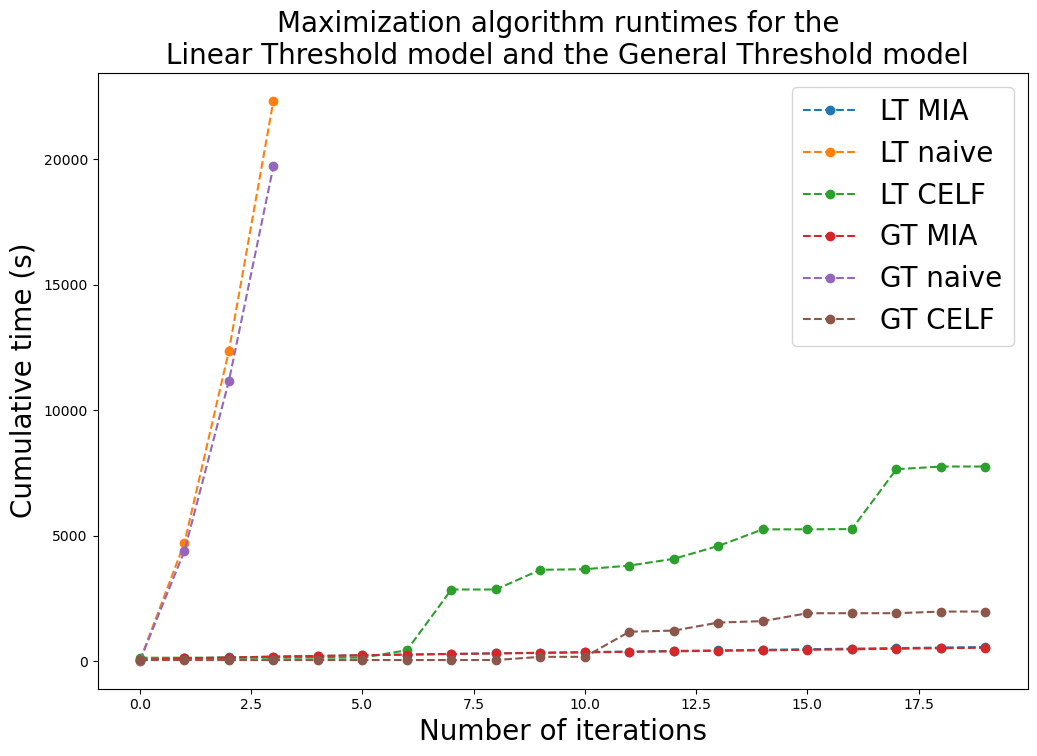

In [63]:
# plot the cumulative timings for the MIA algorithm as a function of the number of iterations
#calculate the cumulative sum of the timings

# make bigger 
plt.rcParams['figure.figsize'] = [12, 8]

cumulative_timings_lt = np.cumsum(timings_lt)

#plot the cumulative timings

plt.plot(cumulative_timings_lt,'o--', label='LT MIA')


# plot the naive timings

plt.plot(times_LT,'o--', label='LT naive')

# plot the celf timings


plt.plot(celf_LT_time,'o--', label='LT CELF')


cumulative_timings_gt = np.cumsum(timings_gt)
#plot the cumulative timings

plt.plot(cumulative_timings_gt,'o--', label='GT MIA')

# plot the naive timings

plt.plot(times_GT,'o--', label='GT naive')

# plot the celf timings

plt.plot(celf_GT_time,'o--', label='GT CELF')



plt.xlabel('Number of iterations', fontsize=20)
plt.ylabel('Cumulative time (s)', fontsize=20)
plt.title('Maximization algorithm runtimes for the \n Linear Threshold model and the General Threshold model', fontsize=20)

plt.legend(fontsize = 20)
plt.show()

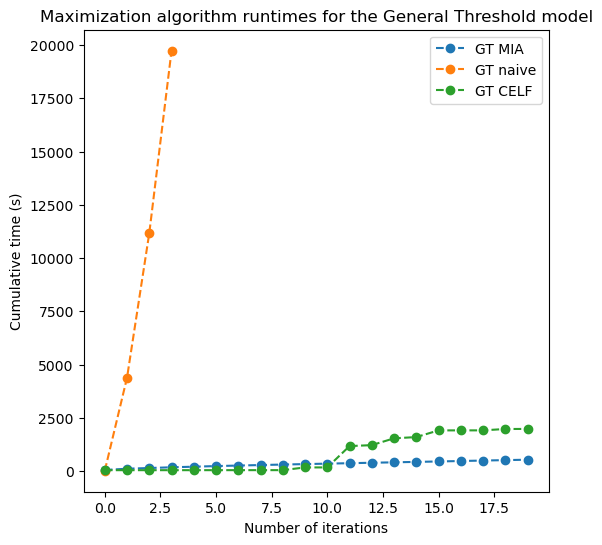

In [40]:
# plot the cumulative timings for the MIA algorithm as a function of the number of iterations
#calculate the cumulative sum of the timings

# make bigger 
plt.rcParams['figure.figsize'] = [6, 6]


cumulative_timings_gt = np.cumsum(timings_gt)
#plot the cumulative timings

plt.plot(cumulative_timings_gt,'o--', label='GT MIA')

# plot the naive timings

plt.plot(times_GT,'o--', label='GT naive')

# plot the celf timings

plt.plot(celf_GT_time,'o--', label='GT CELF')


plt.xlabel('Number of iterations')
plt.ylabel('Cumulative time (s)')
plt.title('Maximization algorithm runtimes for the General Threshold model')

plt.legend()
plt.show()